In [1]:
import sys
import os
from tqdm import tqdm
# from src.models.setup_model import setup_sam2, load_sam2

# Aggiunge il percorso del progetto al PYTHONPATH
current_dir = os.path.abspath(os.getcwd())
project_home_dir = os.path.abspath(os.path.join(current_dir, os.pardir))

sys.path.append(project_home_dir)

# # Carica il modello SAM2
# setup_sam2(project_home_dir)
# predictor = load_sam2(project_home_dir)

In [2]:
import src.data.make_dataset as make_dataset
import src.data.image_info as image_info

slice_dict = make_dataset.load_image_slices(os.path.join(project_home_dir, r"data\raw"))
masks_path_list = {
    'BZ2': r"C:\Users\cical\Documents\GitHub\Repositories\pig_tissue_segmentation\drive-download-20250222T173434Z-001\slice_BZ2_preprocessed_collagen_tissue_mask.png",
    'BZ3': r"C:\Users\cical\Documents\GitHub\Repositories\pig_tissue_segmentation\drive-download-20250222T173434Z-001\slice_BZ3_preprocessed_collagen_tissue_mask.png",
    'BZ5': r"C:\Users\cical\Documents\GitHub\Repositories\pig_tissue_segmentation\drive-download-20250222T173434Z-001\slice_BZ5_preprocessed_collagen_tissue_mask.png",
    'BZ6': r"C:\Users\cical\Documents\GitHub\Repositories\pig_tissue_segmentation\drive-download-20250222T173434Z-001\slice_BZ6_preprocessed_collagen_tissue_mask.png",
    'RE1': r"C:\Users\cical\Documents\GitHub\Repositories\pig_tissue_segmentation\drive-download-20250222T173434Z-001\slice_RE1_preprocessed_collagen_tissue_mask.png",
    'RE2': r"C:\Users\cical\Documents\GitHub\Repositories\pig_tissue_segmentation\drive-download-20250222T173434Z-001\slice_RE2_preprocessed_collagen_tissue_mask.png",
}


for slice_id in tqdm(slice_dict):
    mask_path = masks_path_list[slice_id]
    imageInfo = image_info.ImageSlice(slice_id)
    imageInfo.load_images(slice_dict[slice_id]['wga'], slice_dict[slice_id]['collagen'], slice_dict[slice_id]['autofluorescence'])
    imageInfo.analyse_image2(mask_path)
    imageInfo.save_results()

 17%|█▋        | 1/6 [01:45<08:46, 105.36s/it]

Results for slice BZ2 saved in C:\Users\cical\Documents\GitHub\Repositories\pig_tissue_segmentation\data\processed\slice_BZ2


 17%|█▋        | 1/6 [02:53<14:26, 173.27s/it]


KeyboardInterrupt: 

In [ ]:
import src.data.pre_process_image as pi
import cv2

mask_path = r"C:\Users\cical\Documents\GitHub\Repositories\pig_tissue_segmentation\drive-download-20250222T173434Z-001\slice_BZ2_preprocessed_collagen_tissue_mask.png"
path_autofluorescence = r"C:\Users\cical\Documents\GitHub\Repositories\pig_tissue_segmentation\data\raw\BZ2_BZ2_CH1_AUTO_MIP.tif"

autofluorescence_image = pi.load_tif_image(path_autofluorescence)
autofluorescence = pi.resize_image(autofluorescence_image, 0.5)
segmented_tissue = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
preprocessed_auto = pi.enhance_image(autofluorescence, segmented_tissue)

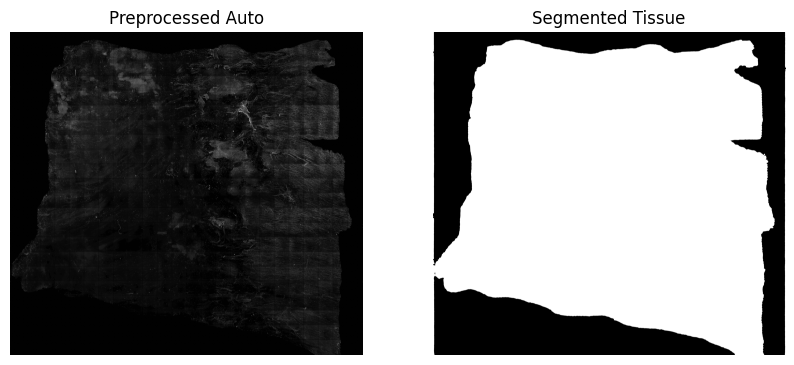

In [ ]:
import matplotlib.pyplot as plt

# Visualizza l'immagine preprocessed_auto
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Preprocessed Auto')
plt.imshow(preprocessed_auto, cmap='gray')
plt.axis('off')

# Visualizza l'immagine segmented_tissue
plt.subplot(1, 2, 2)
plt.title('Segmented Tissue')
plt.imshow(segmented_tissue, cmap='gray')
plt.axis('off')

plt.show()

In [ ]:
superpixel_segments = pi.generate_superpixels(preprocessed_auto, segmented_tissue)

In [ ]:

import numpy as np
from skimage.segmentation import mark_boundaries
superpixel_viz = mark_boundaries(cv2.cvtColor(preprocessed_auto, cv2.COLOR_GRAY2RGB), superpixel_segments, mode='thick')

In [ ]:
import src.models.segmentation as sg

mask = sg.superpixel_clustering_segmentation(preprocessed_auto, superpixel_segments)


In [ ]:
import cv2

# Converti la maschera in un'immagine a 8 bit
mask_8bit = (mask * 255).astype('uint8')

# Salva la maschera come immagine
cv2.imwrite('mask.png', mask_8bit)

True

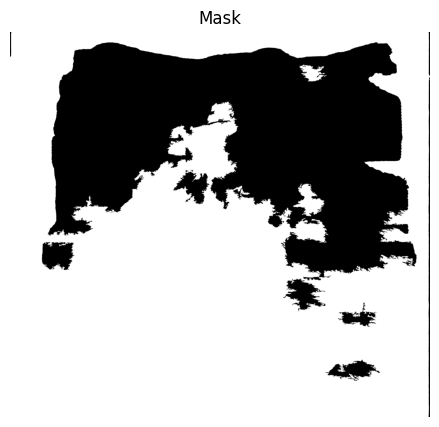

In [ ]:
import matplotlib.pyplot as plt

# Visualizza l'immagine mask
plt.figure(figsize=(10, 5))
plt.title('Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')
plt.show()